In [1]:
print('Welcome to Spam detection system')

Welcome to Spam detection system


In [6]:
import pandas as pd
data=pd.read_csv("data/train.csv")

In [8]:
data.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [9]:
count=data.isnull().sum().sort_values(ascending=False) # COUNTING HOW MUCH MISSING VALUES
percent=((data.isnull().sum()/len(data)*100).sort_values(ascending=False))
missData=pd.concat([count,percent],axis=1,keys=['count','percentage'])
# count
# percent
print("Count and percentage of missing values for the columns: ")
missData

Count and percentage of missing values for the columns: 


,count,percentage
Is_Response,0,0.0
Device_Used,0,0.0
Browser_Used,0,0.0
Description,0,0.0
User_ID,0,0.0


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
print('Percentage for Default\n')
value=round(data.Is_Response.value_counts(normalize=True)*100,2)
print(value)

Percentage for Default

happy        68.12
not happy    31.88
Name: Is_Response, dtype: float64


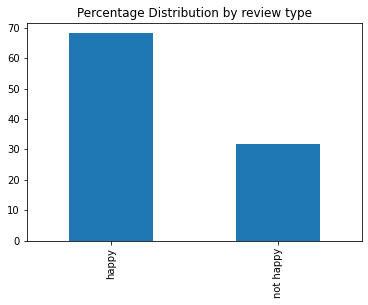

In [11]:
plt.title('Percentage Distribution by review type')
value.plot(kind='bar')
plt.show()

In [12]:
data=data[['Description','Is_Response']]

In [13]:
import re, string
# THIS FUNCITON CONVERTS TO LOWER-CASE, REMOVES SQWARE BRACKETS, REMOVES NUMBERS, AND PUNCTUATION
def text_clean_1(text):
    text=text.lower() # to converting lower case
    text=re.sub('\[.*?\]','',text) # to removing the bigger brackets
    text=re.sub('[%s]' % re.escape(string.punctuation),'',text) # to removing the punctuation mark
    text=re.sub('\w*\d\w*','',text) # to removing the digits
    return text

cleaner1=lambda x: text_clean_1(x)

In [15]:
# NOW SHOWING THE UPDATED CLEANDE TEXT
new_column=pd.DataFrame(data.Description.apply(cleaner1))
data['Cleaned_Description']=new_column # STORING THE NEW COLUMN INTO DATASETS
# data
data.head(10)

,Description,Is_Response,Cleaned_Description
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...
5,We had - rooms. One was very nice and clearly ...,happy,we had rooms one was very nice and clearly ha...
6,My husband and I have stayed in this hotel a f...,not happy,my husband and i have stayed in this hotel a f...
7,My wife & I stayed in this glorious city a whi...,happy,my wife i stayed in this glorious city a whil...
8,My boyfriend and I stayed at the Fairmont on a...,happy,my boyfriend and i stayed at the fairmont on a...
9,"Wonderful staff, great location, but it was de...",not happy,wonderful staff great location but it was defi...


In [16]:
# import re, string
def text_clean_2(text):
    text=re.sub('[''""_]','',text) # REMOVING EXTRA GAP FROM TEXT
    text=re.sub('\n','',text) # REMOVING NEW LINE FROM TEXT
    return text
cleaner2=lambda x: text_clean_2(x)

In [17]:
new_column2=pd.DataFrame(data['Cleaned_Description'].apply(cleaner2))
data['new_Cleaned_Description']=new_column2
# data

In [18]:
from sklearn.model_selection import train_test_split
x = data.new_Cleaned_Description
y = data.Is_Response
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state = 225)

In [19]:
print('x_train: ',len(x_train))
print('x_test: ',len(x_test))
print('y_train: ',len(y_train))
print('y_test: ',len(y_test))

x_train:  35038
x_test:  3894
y_train:  35038
y_test:  3894


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvect = TfidfVectorizer()

In [21]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000)

In [22]:
from sklearn.pipeline import Pipeline
model = Pipeline([('vectorizer',tvect),('classifier',clf)]) # THIS WIIL FIRST CREATE A VECTORIZER AND THAN WILL CREATE A CLASSIFIER
# model
model.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=10000))])

In [23]:
from sklearn.metrics import confusion_matrix
predict = model.predict(x_test)
# print(predict)
confusion_matrix(predict, y_test)

array([[2278,  179],
       [ 293, 1144]], dtype=int64)

In [24]:
from sklearn.metrics import accuracy_score as acs, precision_score as prs, recall_score as res
acc = int(acs(predict, y_test)*100)
preScore = int(prs(predict, y_test,average = 'weighted')*100)
recallScore = int(res(predict, y_test, average = 'weighted')*100)
print("Accuracy : ",acc,"%")
print("Precision : ",preScore,"%")
print("Recall : ",recallScore,"%")

Accuracy :  87 %
Precision :  87 %
Recall :  87 %


In [27]:
rev = input("Enter your opinion: ")
review = [rev]
result = model.predict(review)
print(result)

Enter your opinion: avergae
['not happy']
